In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sbn
import os

## 1. Import Pokedex csv
Using the csv generated from the pokemon scraper notebook, let's bring it in and load it as a DataFrame

Using the same paths as the scraper, I'll bring in the CSV. Assumption being, you ran the scraper to create the CSV at the path specified

In [ ]:
home_dir = os.path.expanduser('~')
download_folder = 'Downloads'
downloads_path = os.path.join(home_dir, download_folder)

csv_name = 'nat_pokedex_data.csv'

full_file_path = os.path.join(downloads_path, csv_name)

pokemon_df = pd.read_csv(full_file_path)

pokemon_df.head()

,id,name,primary_type,secondary_type,hp,attack,defense,special_attack,special_defense,speed,evolution,is_baby,is_legendary,is_mythical,is_mega,generation,species
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,['Ivysaur'],False,False,False,False,generation-i,Bulbasaur
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,['Venusaur'],False,False,False,False,generation-i,Ivysaur
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,[],False,False,False,False,generation-i,Venusaur
3,10033,Venusaur-Mega,Grass,Poison,80,100,123,122,120,80,[],False,False,False,True,generation-i,Venusaur
4,10195,Venusaur-Gmax,Grass,Poison,80,82,83,100,100,80,[],False,False,False,False,generation-i,Venusaur


## 2. Clean up DataFrame and calculate some new columns
Great! The next thing I want to do is create a few new columns. To start, I'm going to do the following:
- Remap generation column to just have values of 1, 2, 3 since that is how most people refer to it
- Calculate a base stat total by adding up all the current stats
- Calculate whether the pokemon is the "final evolution" of its species. In other words, it no longer evolves into anything else
- Create a flag for if a Pokemon is dual type or not

In [ ]:
# create value mapping dict

generation_map = {
    'generation-i': 1,
    'generation-ii': 2,
    'generation-iii': 3,
    'generation-iv': 4,
    'generation-v': 5,
    'generation-vi': 6,
    'generation-vii': 7,
    'generation-viii': 8,
    'generation-ix': 9
}

# pass into .map
pokemon_df['generation'] = pokemon_df['generation'].map(generation_map)

pokemon_df.head()

,id,name,primary_type,secondary_type,hp,attack,defense,special_attack,special_defense,speed,evolution,is_baby,is_legendary,is_mythical,is_mega,generation,species
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,['Ivysaur'],False,False,False,False,1,Bulbasaur
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,['Venusaur'],False,False,False,False,1,Ivysaur
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,[],False,False,False,False,1,Venusaur
3,10033,Venusaur-Mega,Grass,Poison,80,100,123,122,120,80,[],False,False,False,True,1,Venusaur
4,10195,Venusaur-Gmax,Grass,Poison,80,82,83,100,100,80,[],False,False,False,False,1,Venusaur


In [ ]:
stat_columns = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']

# ensure stat columns are casted to an int before performing operation
pokemon_df[stat_columns] = pokemon_df[stat_columns].astype(int)
pokemon_df['total_base_stat'] = pokemon_df[stat_columns].sum(axis=1)

pokemon_df.head()

,id,name,primary_type,secondary_type,hp,attack,defense,special_attack,special_defense,speed,evolution,is_baby,is_legendary,is_mythical,is_mega,generation,species,total_base_stat
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,['Ivysaur'],False,False,False,False,1,Bulbasaur,318
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,['Venusaur'],False,False,False,False,1,Ivysaur,405
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,[],False,False,False,False,1,Venusaur,525
3,10033,Venusaur-Mega,Grass,Poison,80,100,123,122,120,80,[],False,False,False,True,1,Venusaur,625
4,10195,Venusaur-Gmax,Grass,Poison,80,82,83,100,100,80,[],False,False,False,False,1,Venusaur,525


In [ ]:
# to do this, we really just need to check if the existing evolution column is empty or not
pokemon_df['is_final_evolution'] = pokemon_df['evolution'] == '[]'

pokemon_df.head()

,id,name,primary_type,secondary_type,hp,attack,defense,special_attack,special_defense,speed,evolution,is_baby,is_legendary,is_mythical,is_mega,generation,species,total_base_stat,is_final_evolution
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,['Ivysaur'],False,False,False,False,1,Bulbasaur,318,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,['Venusaur'],False,False,False,False,1,Ivysaur,405,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,[],False,False,False,False,1,Venusaur,525,True
3,10033,Venusaur-Mega,Grass,Poison,80,100,123,122,120,80,[],False,False,False,True,1,Venusaur,625,True
4,10195,Venusaur-Gmax,Grass,Poison,80,82,83,100,100,80,[],False,False,False,False,1,Venusaur,525,True


In [13]:
# similarly, we're just checking if the secondary_type column is null
pokemon_df['is_dual_type'] = pokemon_df['secondary_type'] == np.nan

pokemon_df.head()

,id,name,primary_type,secondary_type,hp,attack,defense,special_attack,special_defense,speed,evolution,is_baby,is_legendary,is_mythical,is_mega,generation,species,total_base_stat,is_final_evolution,is_dual_type
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,['Ivysaur'],False,False,False,False,1,Bulbasaur,318,False,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,['Venusaur'],False,False,False,False,1,Ivysaur,405,False,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,[],False,False,False,False,1,Venusaur,525,True,False
3,10033,Venusaur-Mega,Grass,Poison,80,100,123,122,120,80,[],False,False,False,True,1,Venusaur,625,True,False
4,10195,Venusaur-Gmax,Grass,Poison,80,82,83,100,100,80,[],False,False,False,False,1,Venusaur,525,True,False


## 3. Total stat analysis based on type
The first thing I am interested in is the distribution among the 6 stat types based on a pokemon's primary type

I'll create a new filtered df just for this purpose, then generate a series of box plots

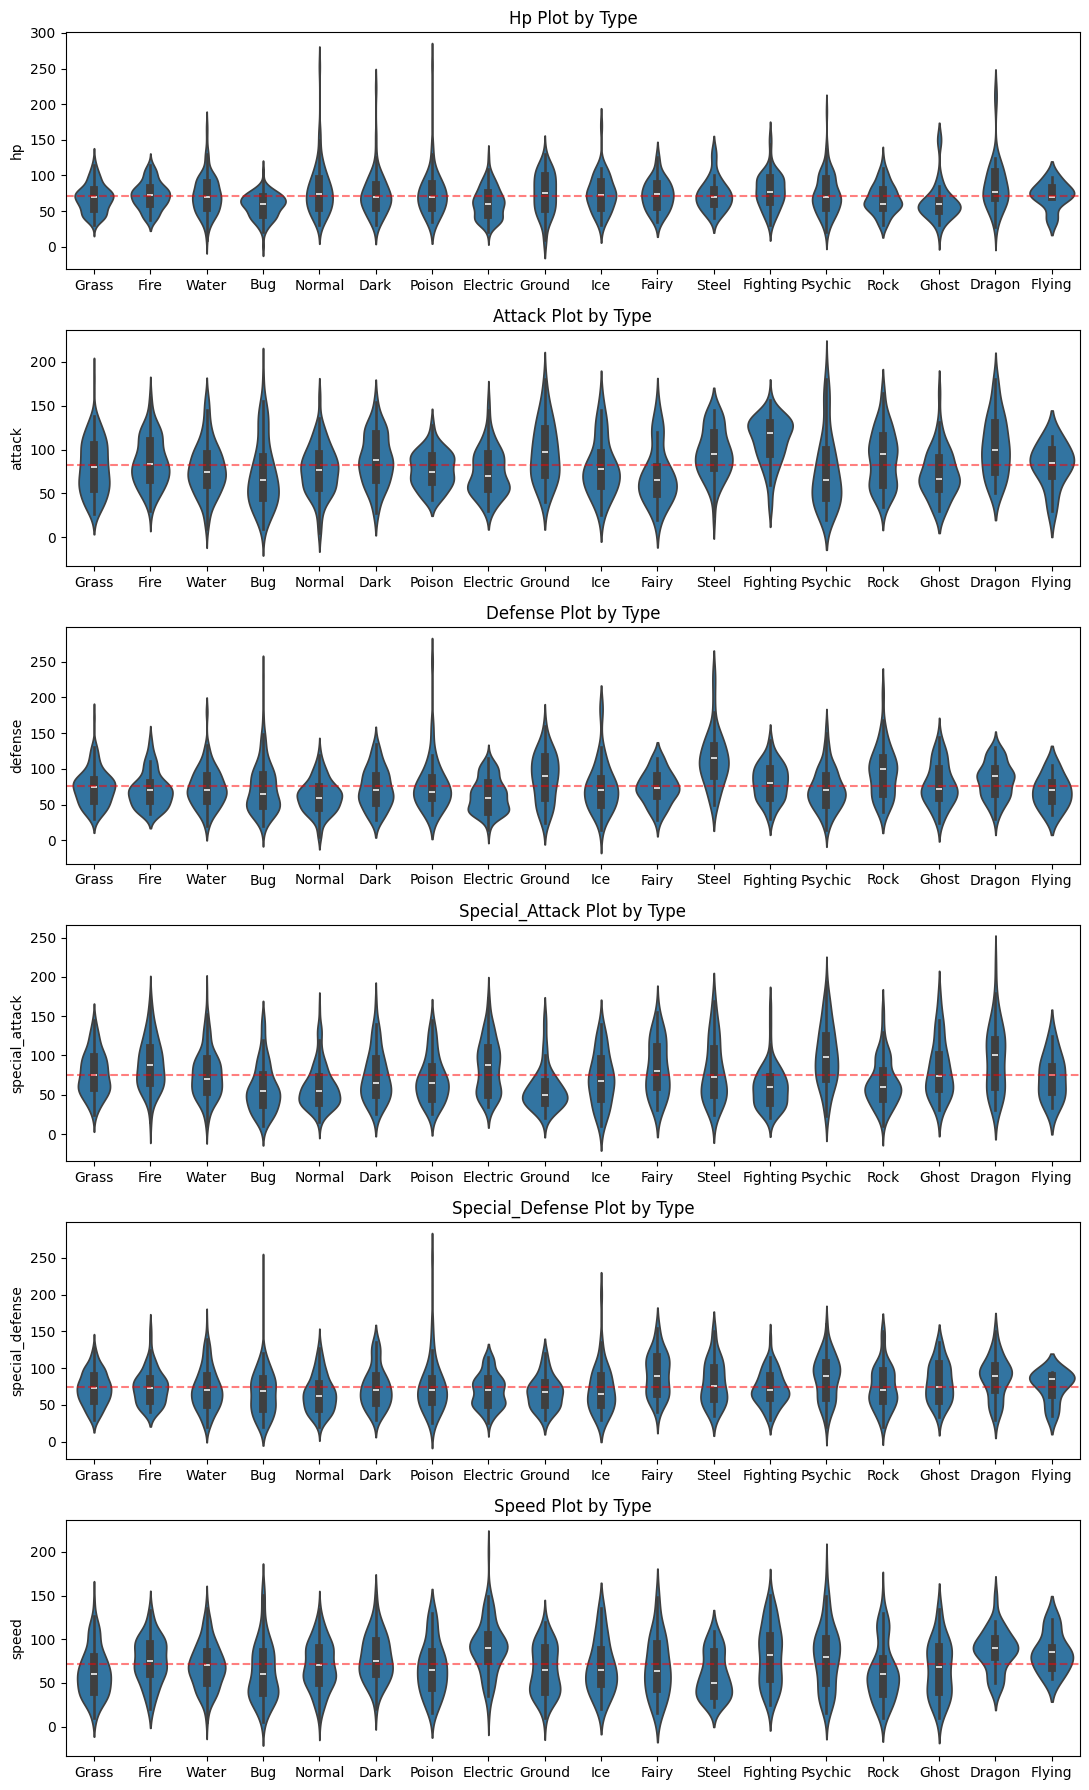

In [48]:
stat_by_ptype_df = pokemon_df[['primary_type', 'hp', 'attack', 'defense', 'special_defense', 'special_attack', 'speed']]
stat_by_ptype_df[stat_columns] = stat_by_ptype_df[stat_columns].astype(int)

# set up the grid
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(11,18))

axes_flatten = axes.flatten()

# we'll generate the charts using a loop over the stat_column variable we made earlier
for i, stat in enumerate(stat_columns):
    ax = axes_flatten[i]
    mean = stat_by_ptype_df[stat].mean()

    sbn.violinplot(
        stat_by_ptype_df,
        x=stat_by_ptype_df['primary_type'],
        y=stat_by_ptype_df[stat],
        ax=ax
    )

    ax.axhline(mean, color='red', linestyle='--', alpha=0.5)

    ax.set_title('{} Plot by Type'.format(stat.title()))
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

